# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

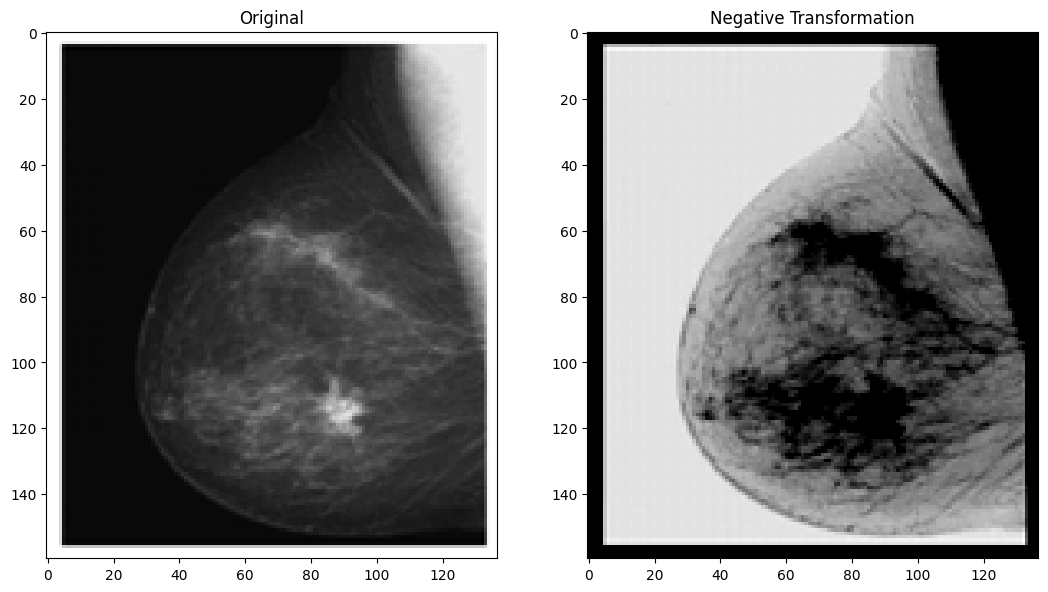

In [4]:
'''
1
Negative Transformation
'''
def negative(img, threshold= 255):
    neg_img = threshold - img
    neg_img = np.clip(neg_img, 0, 255)  # handel invalid range
    return neg_img
img = io.imread('imgs/Picture1.png')
if img.shape[-1] == 4:  
    img = img[:, :, :3]  
img_gray = rgb2gray(img) * 255
neg_trans = negative(img_gray, threshold=100)
show_images([img_gray, neg_trans],['Original', 'Negative Transformation'])



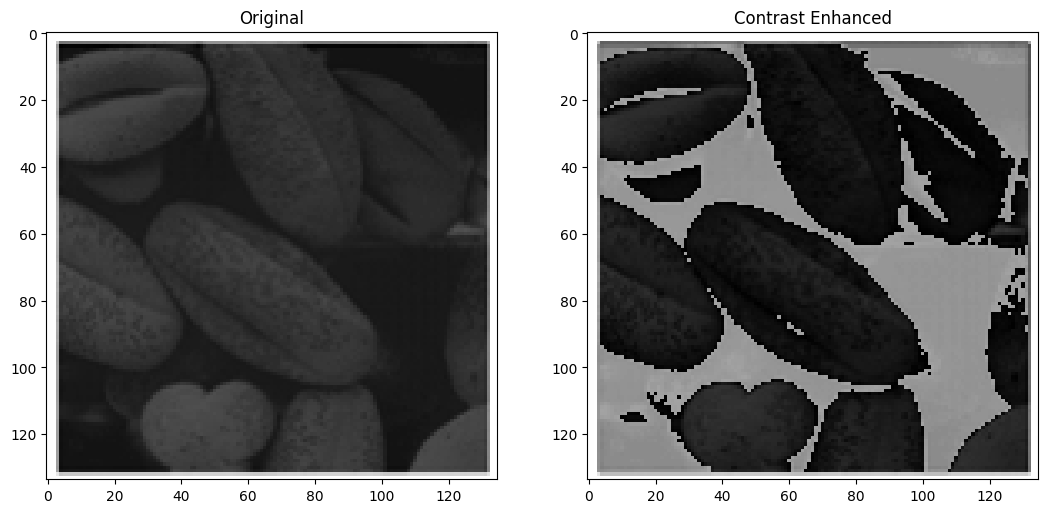

In [5]:
'''
2
Contrast Enhancement
'''
# T(p)=qmin​+((qmax​-qmin)​/(pmax​−pmin)​​)×(p−pmin​)
# 50 + ((200-50)/(100-0))*(p - 0)
# T(p) = 50 + 1.5 * p

def contrast_enhancement(img):
    mask = (img >=0) & (img <= 100)
    img_enh = img.copy()
    img_enh[mask] = 50 + 1.5*img_enh[mask]
    return img_enh

img1 = io.imread('imgs/Picture2.png')
if img1.shape[-1] == 4:  
    img1 = img1[:, :, :3]  
img_gray1 = rgb2gray(img1) * 255  


enhanced_img = contrast_enhancement(img_gray1)
#show spectrum of levels
# showHist(img_gray1)
# showHist(enhanced_img)
show_images([img_gray1, enhanced_img], ['Original', 'Contrast Enhanced'])


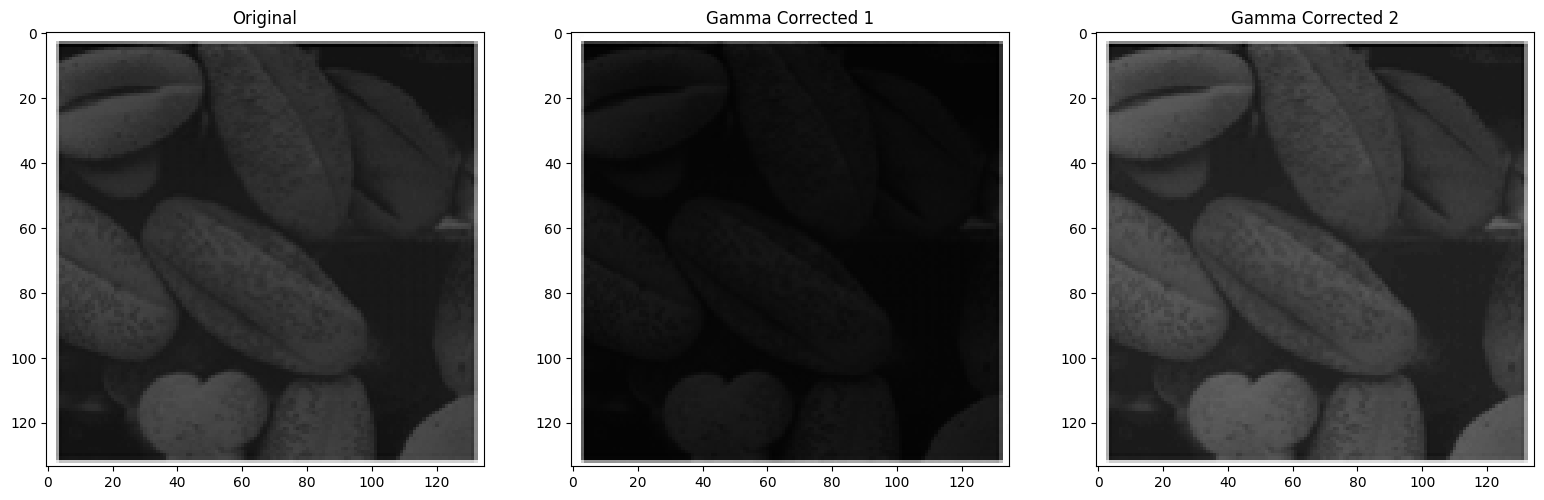

In [6]:
'''
3
Gamma Correction
'''
def gamma_correction(img, c, gamma):
    return c * np.power(img, gamma)

gammaCorrectedImg1 = gamma_correction(img_gray1, 1, 3)
gammaCorrectedImg2 = gamma_correction(img_gray1, 1, 0.5)

images = [img_gray1, gammaCorrectedImg1, gammaCorrectedImg2]
labels = ['Original', 'Gamma Corrected 1', 'Gamma Corrected 2']
show_images(images, labels)

# What is the effect of decreasing  gamma ?
# 1)
# When gamma is less than 1 the image becomes brighter. This is because the function 
# T(p)=c⋅p^gamma maps low pixel values to higher values, 
# lightening darker areas while highlights doesnt change.
# 2)
# When gamma is greater than 1the image becomes darker
# Higher pixel values are decreaesed, which darkens lighter areas and 
# reduce overall brightness




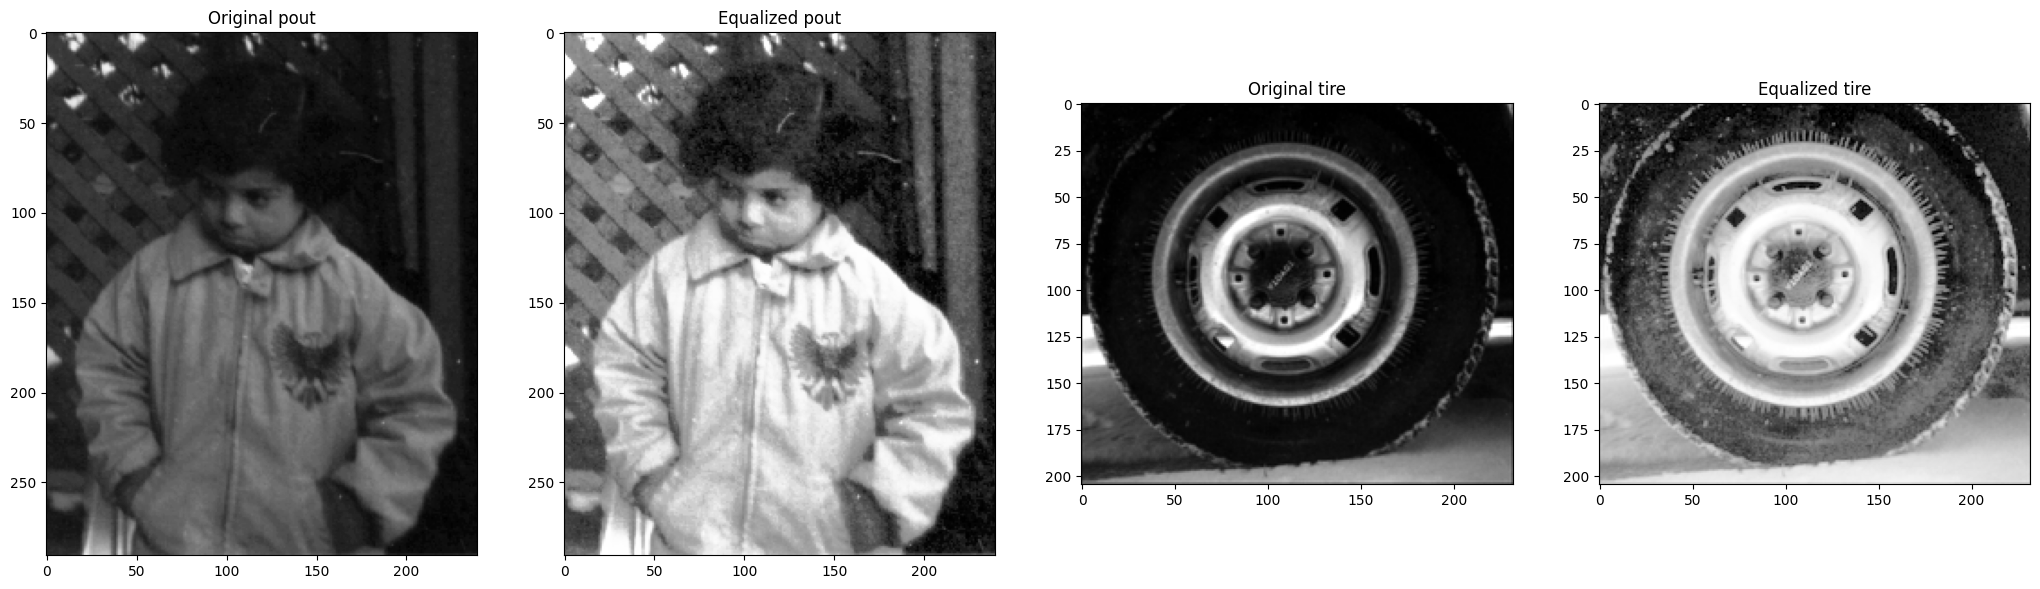

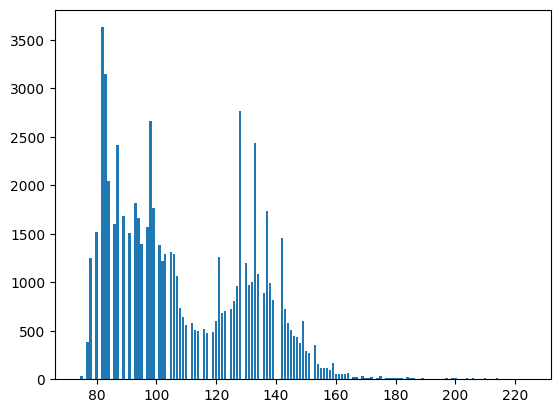

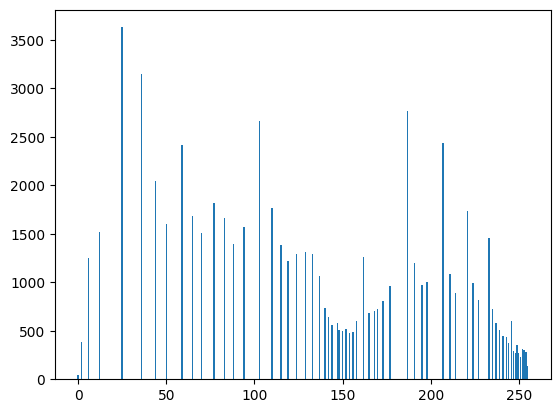

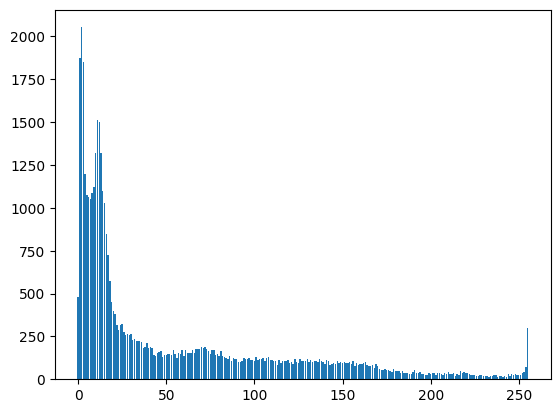

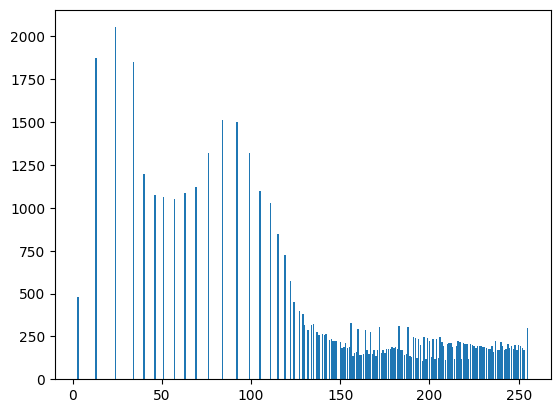

In [15]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def histogram_equalization(img):
    G = 256  
    H = np.zeros(G)
    H, _ = np.histogram(img, bins=np.arange(G+1), density=False)
    H_c = np.cumsum(H)
    N, M = img.shape 
    T = np.round((G - 1) * H_c / (N * M)).astype(np.uint8)  # Normalized cumulative distribution
    return T[img]

img_pout = io.imread('./imgs/pout.tif')
img_tire = io.imread('./imgs/tire.tif')

equalized_pout = histogram_equalization(img_pout)
equalized_tire = histogram_equalization(img_tire)

show_images([img_pout, equalized_pout, img_tire, equalized_tire],
            ['Original pout', 'Equalized pout', 'Original tire', 'Equalized tire'])
showHist(img_pout)
showHist(equalized_pout)
showHist(img_tire)
showHist(equalized_tire)    
